In [1]:
from tunable_agents import utility, main
import utils
import gin
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tf_agents.environments import tf_py_environment
from tf_agents.policies import py_tf_eager_policy, random_py_policy
from tunable_agents.environments.gathering_env import gathering_env
import matplotlib.pyplot as plt

%matplotlib inline
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
absolute_path = "C:/Users/maler/Federico/Università/Master/Tesi"
configs_dir = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/tunable-agents-MORL/configs/"

gin_files = [configs_dir + "envs/gathering_replication_env.gin"]
gin_files = [configs_dir + "envs/gathering_fixed_env.gin"]
gin_bindings = []
utility.load_gin_configs(gin_files, gin_bindings)

ERROR:root:Path not found: envs/gathering_replication_env.gin


# TF-Agents Policy

In [ ]:
absolute_path = "C:/Users/maler/Federico/Università/Master/Tesi"
configs_dir = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/tunable-agents-MORL/configs/"
root_dir = absolute_path + "/experiments_results"
experiment_name = "gathering_longer_epochs"

gin_files = [configs_dir + "envs/gathering_replication_env.gin"]
gin_files = [configs_dir + "envs/gathering_fixed_env.gin"]
gin_bindings = []
utility.load_gin_configs(gin_files, gin_bindings)

#root_dir = os.path.expanduser(root_dir)
#experiment_dir = os.path.join(root_dir, gin.query_parameter('train_eval.experiment_name'))

policy_dir = os.path.join(root_dir, experiment_name, "policy")

In [ ]:
env = gathering_env.GatheringWrapper(utility_repr=np.array([1,2,3,4,5,6], dtype=np.float32))
env = gathering_env.GatheringWrapper()
#env = gathering_env.GatheringWrapper(cumulative_rewards_flag=True)
#tf_env = tf_py_environment.TFPyEnvironment(env)

#saved_policy = tf.compat.v2.saved_model.load(policy_dir)
eager_py_policy = py_tf_eager_policy.SavedModelPyTFEagerPolicy(
    policy_dir, env.time_step_spec(), env.action_spec())

random_policy = random_py_policy.RandomPyPolicy(time_step_spec=None,
    action_spec=env.action_spec())


In [ ]:
utils.policy_play_episode(env, eager_py_policy)

In [ ]:
print(env._utility_repr)
print(env._prev_step_utility)

In [ ]:
utils.policy_evaluate_average_utility(env, eager_py_policy, 1000)

In [ ]:
print(eager_py_policy._policy.model_variables[0].shape)
print(eager_py_policy._policy.model_variables[1].shape)
print(eager_py_policy._policy.model_variables[2].shape)
print(eager_py_policy._policy.model_variables[3].shape)
print(eager_py_policy._policy.model_variables[4].shape)
print(eager_py_policy._policy.model_variables[5].shape)
print(eager_py_policy._policy.model_variables[6].shape)
print(eager_py_policy._policy.model_variables[7].shape)

# David's Saved Model

In [21]:
root_path = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/models/"
david_root_path = "C:/Users/maler/Federico/Università/Master/Tesi/david_code/tunable-agents/tunable_gathering/models/"
experiment = "dqn_model_tunable_DDMMYY.h5"

In [22]:
env = gathering_env.GatheringWrapper()

model = keras.models.load_model(os.path.join(david_root_path, experiment))

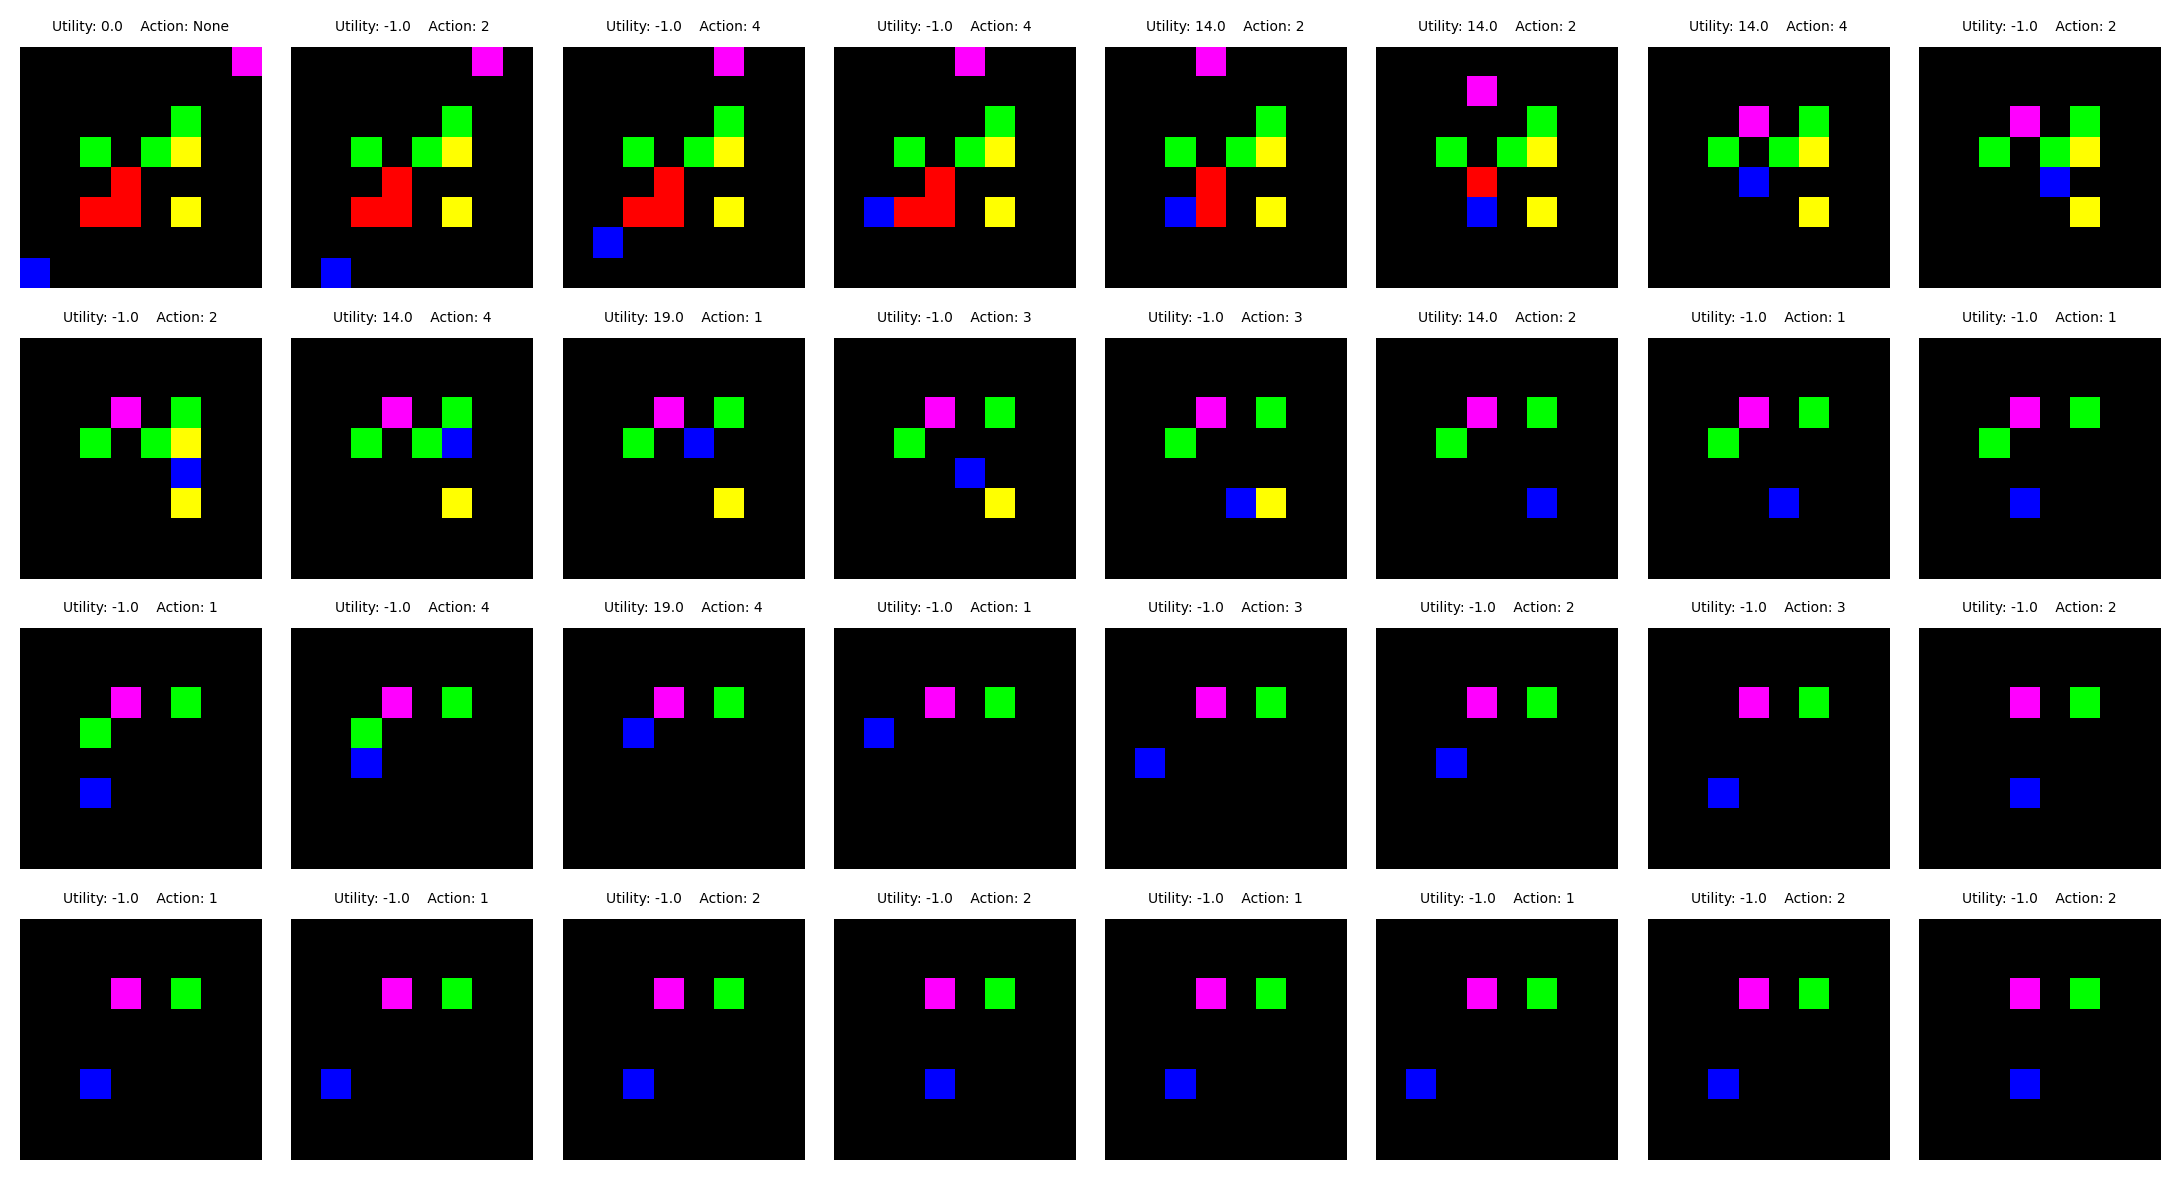

In [23]:
utils.model_play_episode(env, model)

In [24]:
print(env._utility_repr)
print(env._prev_step_utility)

[-0.025 -0.125  0.5    0.375  0.375 -0.375]
84.0


In [ ]:
utils.model_evaluate_average_utility(env, eager_py_policy, 5000)